In [7]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/FINAL.keras')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Predicted label: paper


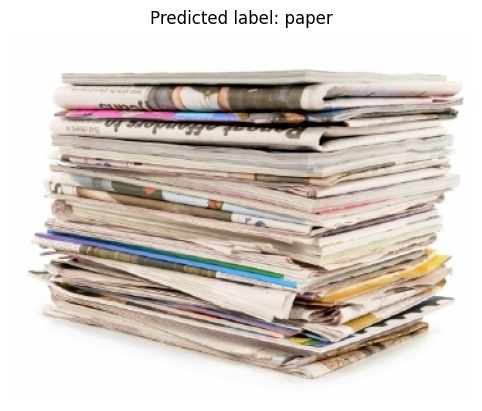

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


# Function to preprocess the image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # MobileNetV2 specific preprocessing
    return (img_array+1)/2*255

# Path to your test image and target size for the model
image_path = '/content/koranbekas.jpg'
target_size = (224, 224)  # MobileNetV2 input size
test_image = preprocess_image(image_path, target_size)

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='/content/model.tflite')
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], test_image)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Decode predictions
class_labels = ['HDPE', 'LDPE', 'PET', 'PP', 'PS', 'PVC', 'glass', 'metal', 'other', 'paper']  # Replace with your actual class labels
predicted_class = np.argmax(output_data, axis=-1)
predicted_label = class_labels[predicted_class[0]]
print(f'Predicted label: {predicted_label}')

plt.imshow(load_img(image_path))
plt.title(f'Predicted label: {predicted_label}')
plt.axis('off')
plt.show()